Кластеризация K-means

## Меры и метрики расстояния между объектами

Понятие метрических пространств, метрик и некоторые их примеры уже рассматривались вами на курсе по линейной алгебре в рамках обучения по профессии. В этом разделе мы вспомним, какие могут быть метрики и их применение в плоскости машинного обучения.

Метрика является функцией, задающей расстояние в метрическом пространстве. Как мы помним из курса линейной алгебры, она должна удовлетворять трем аксиомам:

1. $\rho(x, y) \geq 0, \rho(x, y) = 0 \Leftrightarrow x = y;$
2. $\rho(x, y) = \rho (y, x);$
3. $\rho(x, y) \leq \rho(x, z) + \rho(z, y).$

Евклидова метрика

$$\rho(x, y) = \sqrt{\sum_{i=1}^{n}(x_{i}-y_{i})^{2}}$$

и манхэттенская метрика

$$\rho(x, y) = \sum_{i=1}^{n}|x_{i}-y_{i}|$$

уже должны быть вам знакомы. 

Также можно показать обобщение этих двух метрик - метрика Минковского:

$$\rho(x, y) = \left ( \sum_{i=1}^{n}|x_{i}-y_{i}|^{q} \right )^{\frac{1}{q}}.$$

При этом при $q = 1$ получаем манхэттенскую ($L_{1}$) метрику, при $q = 2$ - евклидову ($L_{2}$) метрику.

Кроме этого, в метрических алгоритмах часто используются так называемые меры близости. В отличие от метрик, которые тем меньше, чем объекты более похожи, меры близости увеличиваются при увеличении похожести (близости) объектов.

Примером такой функции может быть _косинусное сходство (косинусная мера)_:

$$\text{cos}\theta = \frac{\left \langle x, y \right \rangle}{||x||\cdot||y||} = \frac{\sum_{i=1}^{n}x_{i}y_{i}}{\sqrt{\sum_{i=1}^{n}x_{i}^{2}}\sqrt{\sum_{i=1}^{n}y_{i}^{2}}}.$$

Из этой функции также вытекает _косинусное расстояние_:

$$\rho_{cos}(x, y) = 1 - \text{cos}\theta = 1 - \frac{\sum_{i=1}^{n}x_{i}y_{i}}{\sqrt{\sum_{i=1}^{n}x_{i}^{2}}\sqrt{\sum_{i=1}^{n}y_{i}^{2}}}.$$

__Аналитический смысл__: объекты представлены в виде векторов, между двумя векторами образуется угол, значение косинуса этого угла – это и есть косинусная мера (следует из формулы скалярного произведения). 

__Почему эта функция - метрика?__

* f(x, x) = 0 - потому что arccos(1)=0
* f(x,y) = f(y,x) - по симметрии - очевидно, что угол между x и y равен углу между y и x
* f(x,y) >= 0 - потому что мы рассматриваем углы от 0 до 180 градусов
* неравенство треугольника (физический смысл)

Именно такая формула используется в функции `scipy.spatial.distance.cosine()` из библиотеки scipy, возвращающая косинусное расстояние между двумя векторами.

Косинусная мера часто используется в анализе текстов.

Кроме косинусной меры в прикладных задачах могут использоваться и другие функции - коэффициент Дайса, коэффициент Жаккара, коэффициент перекрытия (см. доп. материалы).

Формула нахождения косинусной меры похожа на _коэффициент корреляции_, который также может быть использован как мера близости и используется обычно в рекомендательных системах:

$$r = \frac{\sum_{i=1}^{n}((x_{i} - \bar{x})(y_{i} - \bar{y}))}{\sqrt{\sum_{i=1}^{n}(x_{i} - \bar{x})^{2}}\sqrt{\sum_{i=1}^{n}(y_{i} - \bar{y})^{2}}}$$

In [36]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from matplotlib.colors import ListedColormap

In [37]:
s = np.array([1,2,3])
s[-3]

1

In [38]:
# расстояние минковского (р=2 - эвклид, р=1 - квартальное)
def dist_mincovski(X1,X2,p):
    if p != 0:
        return np.sum(np.abs(X1-X2)** p) ** 1/p
    else: return 1

def dist_cos(X1,X2):
    
    return 1 - (np.dot(X1.reshape(1,-1), X2.reshape(-1,1)))/np.sum(X1 ** 2)/ np.sum(X2 ** 2)



C:\Users\424B~1\AppData\Local\Temp/ipykernel_34784/1605880411.py:9: RuntimeWarning: invalid value encountered in true_divide
  return 1 - (np.dot(X1.reshape(1,-1), X2.reshape(-1,1)))/np.sum(X1 ** 2)/ np.sum(X2 ** 2)


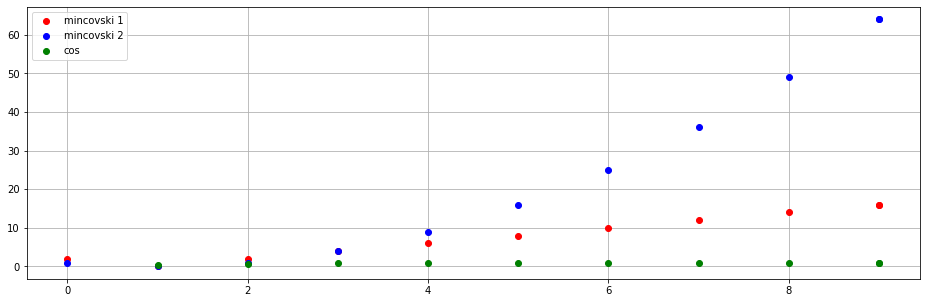

In [39]:
X1 = np.array([1,1])
plt.figure(figsize = (16,5))
               
               
for xi in range(10):
    X2 = np.array([xi,xi])
    r1 = dist_mincovski(X1,X2,1)
    r2 = dist_mincovski(X1,X2,2)
    rc = dist_cos(X1,X2)
    
    plt.plot(xi,r1,'or')
    plt.plot(xi,r2,'ob')
    plt.plot(xi,rc,'og')
    
    
#
plt.plot(xi,r1,'or', label = 'mincovski 1')
#
plt.plot(xi,r2,'ob', label = 'mincovski 2')
plt.plot(xi,rc,'og', label = 'cos')   
plt.legend()
plt.grid(True)
plt.show()
    

In [40]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

Разделим выборку на обучающую и тестовую

In [123]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

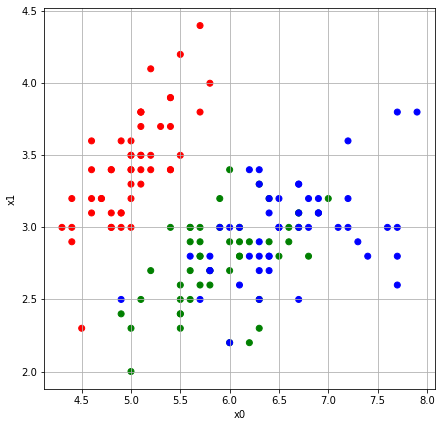

In [42]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.grid()
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

## Обучение без учителя. Кластеризация. K-means

До этого мы рассматривали методы обучения с учителем, то есть задачи, в которых изначально есть размеченная обучающая выборка данных с известными ответами на них и тестовая выборка, на которой проверяется качество алгоритма. В этом разделе речь пойдет об _обучении без учителя (unsupervised learning)_ - случае, когда в роли обучающей выборки выступает просто набор объектов $x_{1},...,x_{l}$, и он же выступает в роли тестовой выборки, а задача состоит в проставлении меток $y_{1},...,y_{l}$ так, что бы объекты с одной и той же меткой были похожи, а с разными - нет. То есть все объекты в пространстве признаков нужно разделить на группы, найти структуру в данных. Это и называется _кластеризацией_. Если раньше мы имели примеры ответов $y$, то сейчас их нет, и нужно строить свои отображения $x \rightarrow y$, отвечающие некоторым свойствам, например, тому, что похожие объекты отображаются в одну метку, а непохожие - в разные. По-простому задачу кластеризации можно сформулировать так: имеется множество точек, которые скапливаются в сгустки, нужно найти возможность относить точки к тому или иному сгустку и предсказывать, в какой сгусток попадет новая точка.

Примерами кластеризации может быть группирование новостей по темам, музыки по жанрам, клиентов по типу поведения и т.д.

Логично возникает вопрос, как измерять качество кластеризации. Есть большое количество инструментов оценки качества кластеризации, они разделяются на _внутренние_ (основанные только на свойствах выборки и кластеров) и _внешние_ (использующие данные об истинном распределении объектов по кластерам, если оно известно).

Примерами внутренних метрик могут быть:

- Внутрикластерное расстояние (также называется компактностью кластеров, cluster cohesion): $$\sum_{k=1}^{K}\sum_{i=1}^{l}[a(x_{i})=k]\rho(x_{i}, c_{k}),$$ где $K$ - количество кластеров, $c_{k}$ - центр кластера. Этот функционал нужно минимизировать, так как в идеальном случае все объекты в одном кластере одинаковы, и расстояние между ними равно нулю.


- Межкластерное расстояние (отделимость кластеров, cluster separation): $$\sum_{i,j=1}^{l}[a(x_{i}) \neq a(x_{j})]\rho(x_{i}, x_{j}).$$ Этот функционал наоборот нужно максимизировать, так как объекты из разных кластеров должны максимально различаться, то есть иметь максимальное расстояние между собой.

    - Часто используются те же формулы, но включающие не расстояние ρ, а его квадрат, получая квадратичное внутрикластерное и межкластерное расстояние:

    $$\sum_{k=1}^{K}\sum_{i=1}^{l}[a(x_{i})=k]\rho^{2}(x_{i}, c_{k}),$$
    $$\sum_{i,j=1}^{l}[a(x_{i}) \neq a(x_{j})]\rho^{2}(x_{i}, x_{j}).$$


- Среднее внутрикластерное расстояние (среднее расстояние внутри каждого кластера, просуммированное по всем кластерам) и среднее межкластерное расстояние (минимизируется и максимизируется, соответственно, по аналогии с двумя первыми функционалами):

    $$\sum_{k=1}^{K}\frac{1}{|k|}\sum_{i=1}^{l}[a(x_{i})=k]\rho(x_{i}, c_{k}),$$
    $$\frac{1}{K}\sum_{i,j=1}^{l}[a(x_{i}) \neq a(x_{j})]\rho(x_{i}, x_{j}),$$ где $|k|$ - количество элементов в кластере под номером $k$.

    - По аналогии с квадратичным внутрикластерным и межкластерным расстоянием - среднее квадратичное внутрикластерное и межкластерное расстояние.

    $$\sum_{k=1}^{K}\frac{1}{|k|}\sum_{i=1}^{l}[a(x_{i})=k]\rho^{2}(x_{i}, c_{k}),$$
    $$\frac{1}{K}\sum_{i,j=1}^{l}[a(x_{i}) \neq a(x_{j})]\rho^{2}(x_{i}, x_{j}).$$ 

- Отношение внутрикластерного и межкластерного расстояний (или средних), минимизируется.


- Индекс Данна (Dunn Index): $$\frac{\text{min}_{1\leq k \leq k' \leq K}d(c_{k},c_{k'})}{\text{max}_{1\leq k \leq K} d(k)},$$ где $d(c_{k},c_{k'})$ - расстояние между кластерами $k$ и $k'$ (между их центрами), $d(k)$ - внутрикластерное расстояние для кластера $k$. Этот функционал требуется максимизировать.

In [43]:
# максимальное внутрикластерное расстояние
def in_claster(X,p):
    d = 0
    for i in range(X.shape[0]-1):
        for j in range(i+1,X.shape[0]-1):
            r = dist_mincovski(X[i,:],X[j,:],p)
            if r>d:
                d = r
    return d            

# минимальное межкластерное расстояние
def out_claster(X1,X2,p):
    d = np.inf
    for i in range(X1.shape[0]):
        for j in range(X2.shape[0]):
            r = dist_mincovski(X1[i,:],X2[j,:],p)
            if r<d:
                d = r
    return d         

Оценим расстояния между группами для набора примеров из ирисов Фишера (2 координаты):

In [44]:
# Среднее внутрикластерное расстояние
K = 0
K_max = []
for k in range(3):
    print('кластер :', k)
    r = in_claster(X_train[y_train == k,:],2)
    K += r
    K_max.append(r)
print('среденее внутриклассовое :',K/3)  

K_min = []
for k1 in range(3):
    for k2 in range(k1+1,3):
        d = out_claster(X_train[y_train == k1,:],X_train[y_train == k2,:],2)
        print('пара: ',k1,k2, ':', d)
        K_min.append(d)
K_dunn = min(K_min) / max(K_max)
print('Индекс Данна :',K_dunn)  

кластер : 0
кластер : 1
кластер : 2
среденее внутриклассовое : 3.47
пара:  0 1 : 0.06499999999999999
пара:  0 2 : 0.10000000000000017
пара:  1 2 : 0.0
Индекс Данна : 0.0


Индекс Данна : 0.0, т.к. есть одинаковые объекты.

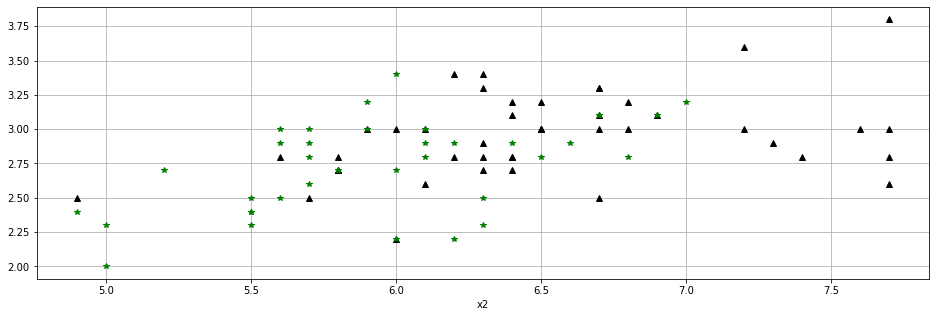

In [45]:
plt.figure(figsize = (16,5))
n1 = 0
n2 = 1
plt.plot(X_train[y_train == 2,n1],X_train[y_train == 2,n2],'^k')
plt.plot(X_train[y_train == 1,n1],X_train[y_train == 1,n2],'*g')
plt.grid(True)
plt.xlabel('x1')
plt.xlabel('x2')
plt.show()


Внешние метрики используются, если есть дополнительные знания о кластеризуемой выборке, например, известно истинное распределение по кластерам. Задачу можно рассматривать как задачу многоклассовой классификации с использованием соответствующих метрик. В этом случае примерами могут быть:

- Rand Index: $$Rand = \frac{TP+FN}{TP+TN+FP+FN}, $$ входящие в формулу обозначения мы встречали при изучении классификации и матриц ошибок. Здесь это количество пар объектов $(x_{i}.x_{j})$, которые принадлежат одному кластеру и одному классу (TP), одному кластеру, но разным классам (TN), разным кластерам, но одному классу (FP), разным кластерам и разным классам (FN). Этот индекс оценивает, сколько пар объектов, находившихся в одном классе, и пар объектов, находившихся в разных классах, сохранили это состояние после работы алгоритма. Он принимает значение от 0 до 1, где 1 - полное совпадение полученных кластеров и исходными классами, 0 - полное отсутствие совпадений.


- Jaccard Index: $$Jaccard = \frac{TP}{TP+TN+FP}.$$ Этот индекс похож на предыдущий, но он не учитывает пары объектов, находящихся в разных кластерах и разных классах. Имеет такую же область определения, как и Rand Index.


- F-мера: $$\sum_{j}\frac{l_{j}}{l}\underset{i}{\text{max}}\left(\frac{2\cdot precision(i,j) \cdot recall(i,j)}{precision(i,j) + recall(i,j)}\right),$$ здесь используются также знакомые из темы классификации параметры точности (precision) и полноты (recall). В данном случае они определяются как: $$precision(i,j)=\frac{l_{ij}}{l_{i}},$$ $$recall(i,j)=\frac{l_{ij}}{l_{j}},$$ где $l_{ij}$ - количество объектов $x_{n}$, принадлежащих кластеру $k_{i}$ и классу $c_{j}$; $l_{i} = |k_{i}|$ - размер кластера $k_{i}$; $l_{j} = |c_{j}|$ - размер класса $c_{j}$.

Про другие внутренние и внешние метрики качества кластеризации можно почитать в дополнительных материалах.

### Алгоритм K-means (K-средних)

Одним из самых простых и популярных алгоритмов кластеризации является алгоритм _K-means (K-средних)_. Заключается он в следующих шагах:

1 . Выбрать количество кластеров $k$, на которые будут делиться данные.

2 . Случайным образом выбрать в пространстве данных $k$ точек $c_{k}$ (центроидов) - центров будущих кластеров.

3 . Для каждой точки из выборки посчитать, к какому из центроидов она ближе.

4 . Переместить каждый центроид в центр выборки, отнесенной к этому центроиду, определив его как среднее арифметическое всех точек кластера:

$$c_{k} = \frac{\sum_{i=1}^{l}[a(x_{i})=k]x_{i}}{\sum_{i=1}^{l}[a(x_{i}) = k]}.$$
5 . Повторить шаги 3-4 до сходимости алгоритма (обычно это оценивается по величине смещения центроида после каждого шага - сходимость означает непревышение смещения какого-то заданного значения).

Результат работы алгоритма значительно зависит от начального выбора центроидов. Существует много методик их выбора, наиболее удачным из которых считается k-means++. Он заключается в последовательном выборе начальных приближений так, что вероятность выбрать в качестве центроида следующую точку пропорциональна квадрату расстояния от нее до ближайшего центроида.

Проблемой метода также является необходимость знать число кластеров, на которые будет делиться выборка. В случае, когда это число неизвестно, вариантом ее решения может быть последовательная кластеризация на разное число кластеров (например, от 1 до 10) с последующим анализом качества работы алгоритма, например, по сумме квадратов внутрикластерных расстояний $$\sum_{k=1}^{K}\sum_{i \in C_{k}}\rho(x_{i}, c_{k})^{2}$$ - выбирается такое число кластеров, начиная с которого при увеличении количества кластеров функционал падает незначительно.

Сделаем простую реализацию алгоритма K-means своими руками на Python.

Вначале сгенерируем три облака точек с помощью инструментов `sklearn`.

In [69]:
from sklearn.datasets import make_blobs
import random

X, y = make_blobs(n_samples=800, centers = 3, random_state=3)
X[:,1] *= 1

Изобразим точки на графике.

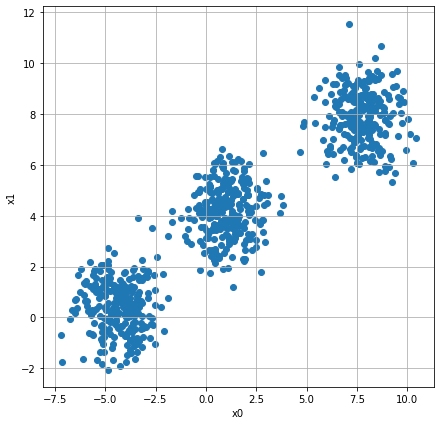

In [70]:
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1])
plt.grid()
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

В качестве метрики расстояния будем использовать евклидово расстояние, функция для которого была написана ранее. В качестве центроидов выберем первые k элементов датасета. Реализуем основной цикл алгоритма.

In [88]:
def kmeans(data, k, max_iterations, min_distance):    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # Создадим словарь для классификации
        classes = {i: [] for i in range(k)}
        
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, classes

In [89]:
def kmeans_predict(centroids, data):    
    # инициализируем центроиды как первые k элементов датасета
    classes = [i for i in range(len(centroids))]
    label = []
    # классифицируем объекты по центроидам
    for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            #print(classification)
            label.append(classification)
    return label
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
        #distance += np.abs(x1[i] - x2[i])
    
    return np.sqrt(distance)
    #return (distance)

Напишем функцию для визуализации кластеров

In [90]:
def visualize(centroids, classes):
    colors = ['r', 'g', 'b','m','y']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item])
    plt.grid(True)        
    plt.show()

In [95]:
# определим максимальное количество итераций
max_iterations = 3

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

# сразу определим известное нам количество кластеров
k = 3

Проверим результат алгоритма после одной итерации

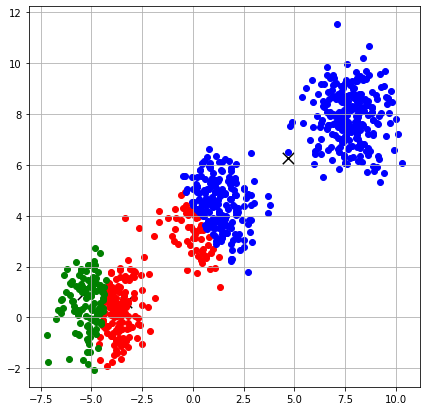

In [97]:

centroids, clusters = kmeans(X[10:,:], k, max_iterations, min_distance)

visualize(centroids, clusters)

Проверим работу алгоритма при различном числе итераций.

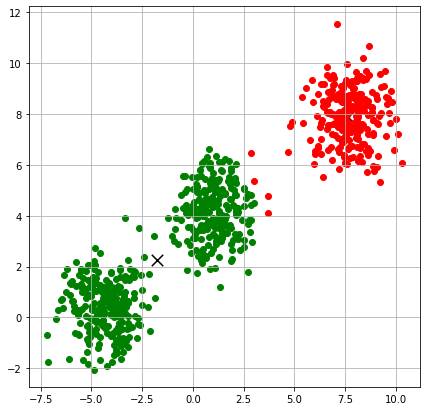

In [100]:
max_iterations = 5

centroids, clusters = kmeans(X[40:,:], k, max_iterations, min_distance)

visualize(centroids, clusters)

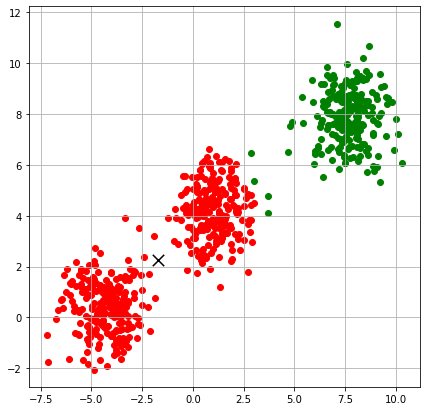

In [101]:
max_iterations = 15
k=2
centroids, clusters = kmeans(X[100:,:], k, max_iterations, min_distance)

visualize(centroids, clusters)

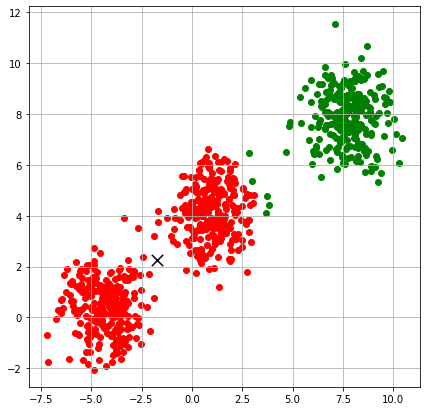

In [102]:
max_iterations = 3

centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

Видно, как при увеличении количества итераций центроиды перемещаются в центр образующихся кластеров.

In [103]:
def get_clast( h = 0.2,xminmax = [], yminmax=[], centroids =[]):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF','#000AFF','#A00AFF','#BB0AFF'])

    # Расчет пределов графика
    xx, yy = np.meshgrid(np.arange(xminmax[0], xminmax[1], h), np.arange(yminmax[0], yminmax[1], h))

    # Получим предсказания для всех точек
    Z =  kmeans_predict(centroids, np.c_[xx.ravel(), yy.ravel()])

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    for centroid in centroids:
            plt.plot(centroid[0], centroid[1],'xk')
    

    # Добавим на график обучающую выборку
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("кластеризация  ")
    plt.show()

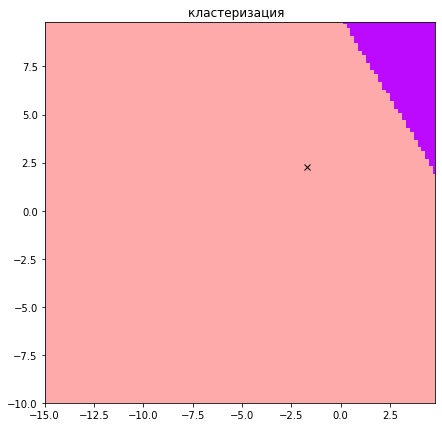

In [104]:
get_clast( h = 0.2,xminmax = [-15,5], yminmax=[-10,10], centroids =centroids)

Как и говорилось ранее, метод K-means очень чувствителен к выбору начальных центров кластеров, и это является одним из его основных минусов, среди которых также сложность работы с разными формами кластеров (они, например, могут быть вытянутыми, образовывать фигуры и т.п.). В связи с этим существуют другие методы кластеризации, о которых можно прочитать в дополнительных материалах. Там же есть сравнение работы алгоритмов с кластерами различных форм.

C:\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


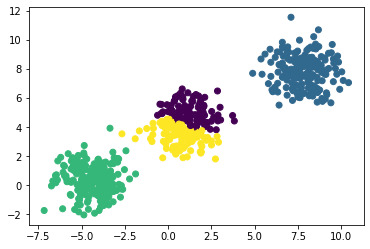

In [125]:
from sklearn.cluster import KMeans
X, y = make_blobs(n_samples=800, centers = 3, random_state=3)
cl=KMeans(n_clusters=4)
cl.fit(X_train)
Yp=cl.predict(X_train)
plt.scatter(X_train[:,0],X_train[:,1],c=Yp)

DBSCAN

In [131]:
from sklearn.cluster import DBSCAN
 

dbscan = DBSCAN(eps=0.5, min_samples=30)
 
dbscan.fit(X)
 
# Готово! Распечатаем метки принадлежности к кластерам
print(dbscan.labels_)

[ 2  0 -1  0  1 -1  2 -1 -1  2 -1 -1  2 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1
 -1 -1 -1 -1  1 -1  0 -1  0 -1  1 -1 -1 -1 -1  1 -1  0 -1 -1 -1 -1 -1 -1
  0 -1 -1 -1  1 -1 -1 -1 -1  0  1 -1 -1 -1 -1  1  1  0 -1 -1  1  0 -1  2
  0 -1 -1  1  0  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1  0  0
  0 -1 -1 -1 -1  2 -1 -1  0 -1  0  1 -1 -1  2  1  1 -1 -1  1  1 -1 -1 -1
  1  1 -1  1  0 -1 -1 -1 -1 -1  0  0  0  2 -1 -1 -1  0  1  2  0  1  2 -1
  0 -1 -1 -1 -1 -1 -1 -1  1  1  0  1  2 -1 -1 -1 -1  2 -1 -1  1 -1 -1 -1
 -1  2  0  0  0  1  2 -1 -1 -1 -1 -1 -1 -1  2 -1 -1  0  0 -1 -1  1 -1 -1
 -1  0  0 -1  0 -1  0 -1 -1 -1 -1 -1 -1 -1  1  0 -1 -1 -1 -1 -1 -1 -1  0
 -1 -1 -1  0 -1  0  0 -1 -1 -1 -1  1 -1  0 -1  1  1 -1  1  1  1  0 -1 -1
 -1  0 -1 -1  0  1  1 -1  0 -1 -1 -1  1 -1  1  2 -1 -1  2  1 -1  2 -1  0
  0 -1  2 -1 -1  0  0 -1 -1 -1 -1  1 -1 -1 -1  1  2 -1 -1  0  0  0  2 -1
  2  0  1 -1 -1 -1 -1 -1  2 -1  1 -1  0  0 -1 -1  1 -1 -1 -1  0  0 -1 -1
 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1  1

In [133]:
def get_clast_DBSCAN( X_test = [], label = []):
    cmap_light = ['#000000', '#0AFFAA','#00A0FF','#FFAAAA', '#AAFFAA','#00AAFF','#000AFF','#A00AFF','#BB0AFF','#BBBAFF']
   

    # Построим график
    
    plt.figure(figsize=(7,7))
    # Добавим на график обучающую выборку
    for i,x in enumerate(X_test.tolist()):
        plt.scatter(x[0], x[1],color=cmap_light[label[i]])
   
    plt.grid(True)
    plt.title("кластеризация  ")
    plt.show()

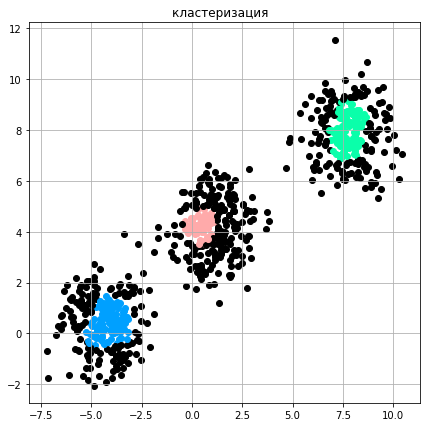

In [134]:
get_clast_DBSCAN(X_test = X,label=np.array(dbscan.labels_)+1)

IndexError: list index out of range

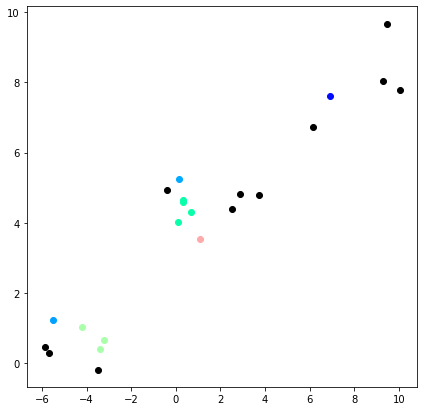

In [136]:
dbscan = DBSCAN(eps=0.25, min_samples=5)
 
dbscan.fit(X_train)

get_clast_DBSCAN(X_test = X_train,label=np.array(dbscan.labels_)+1)

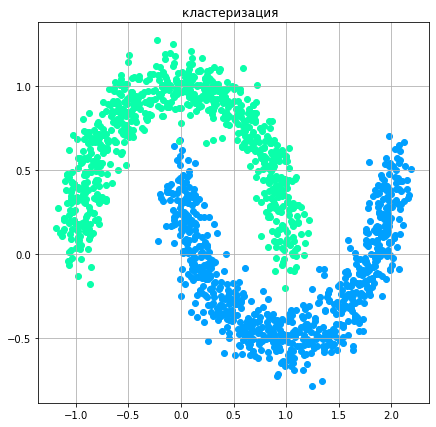

In [137]:
from sklearn.datasets import make_moons
noisy_moons = make_moons(n_samples=1500, noise=.1)

get_clast_DBSCAN(X_test = noisy_moons[0],label=np.array(noisy_moons[1]+1))

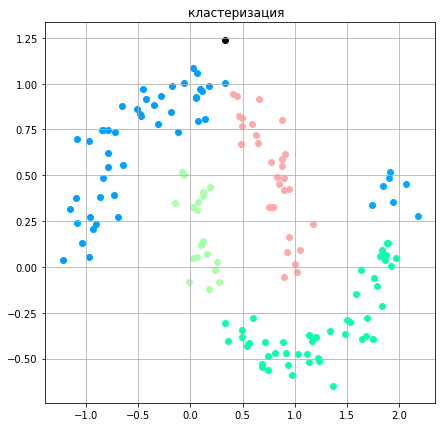

In [113]:

dbscan = DBSCAN(eps=0.22, min_samples=5)
 
dbscan.fit(noisy_moons[0])

get_clast_DBSCAN(X_test = noisy_moons[0],label=np.array(dbscan.labels_)+1)

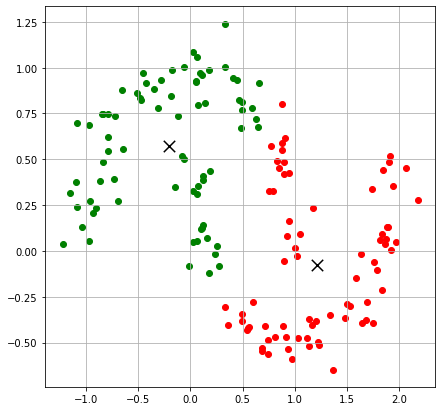

In [114]:
max_iterations = 10
k = 2
min_distance = 0.1
centroids, clusters = kmeans(noisy_moons[0], k, max_iterations, min_distance)

visualize(centroids, clusters)

## Литература

1. Факторный, дискриминантный и кластерный анализ: Пер. с англ./Дж.-О. Ким, Ч. У. Мьюллер, У. Р. Клекка и др.; Под ред. И. С. Енюкова. — М.: Финансы и статистика, 1989.— 215 с.
2. [Об использовании мер сходства при анализе документации](http://ceur-ws.org/Vol-803/paper18.pdf)
3. [KNN Algorithm](https://medium.com/datadriveninvestor/knn-algorithm-and-implementation-from-scratch-b9f9b739c28f)
4. [Проклятие размерности](http://www.machinelearning.ru/wiki/index.php?title=%D0%9F%D1%80%D0%BE%D0%BA%D0%BB%D1%8F%D1%82%D0%B8%D0%B5_%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B8); ([Иллюстрация](https://www.youtube.com/watch?v=R2hQIJb0Lis))
5. [Оценка качества кластеризации](http://neerc.ifmo.ru/wiki/index.php?title=%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%B2_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B5_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8)
6. [Обзор алгоритмов кластеризации данных](https://habr.com/ru/post/101338/)
7. [Работа алгоритмов кластеризации на классах разной формы](https://scikit-learn.org/stable/modules/clustering.html)

## Summary

__kNN__
* Метрический алгоритм классификации по "ближайшим соседям"
* Разновидности: ближайший сосед, k ближайших соседей, k взвешанных ближайших соседей
* Алгоритм интерпретируем
* В основе алгоримта лежит _гипотеза компактности_: если мера сходства объектов введена достаточно удачно, то схожие объекты гораздо чаще лежат в одном классе, чем в разных
* Проблемы и их решения
    * Выбор метрики __->__ нет единого алгоритма, позволяющего выбрать метрику, поэтому используют что-то из "стандартного" (например, Евклидова)
    * Выбор числа соседей k __->__ подбор на основании кросс-валидации, чаще даже по контролю одного объекта (leave-one-out cross-validation)
    * Выбросы/шум __->__ ручной отсев, придание меньшего веса, либо поиск типичных представителей классов (эталонов) алгоритмом STOLP, тогда объект можно классифицировать по ближайшему эталону
    * Большие выборки __->__ уменьшение выборки за счет удаления неинформативных объектов (например, оставить только эталоны), либо более быстрые структуры данных (например, kd-деревья)
    * Много признаков - "проклятие размерности" - суммы большого числа отклонений по отдельным признакам с большой вероятностью имеют очень близкие значения (согласно закону больших чисел), то есть в пространстве высокой размерности все объекты примерно одинаково далеки друг от друга __->__ предварительный отбор признаков (feature selection)

__k-means__
* Кластеризует неразмеченные объекты, помогая найти структуру в данных
* Использует метрику близости, является метрическим алгоритмом
* Можно использовать для генерации нового признака - номера кластера
* Проблемы и их решения
    * Алгоритм чувствителен к выбору начальных центров кластеров __->__ как вариант, на начальном этапе принимать в качестве центров самые отдаленные точки
    * Необходимо заранее знать количество кластеров __->__ выбор исходя из природы данных, либо оценка исходя из распределений признаков или 2D представления объектов (PCA)
    * Не справляется с задачей, когда объект принадлежит к разным кластерам в равной степени или не принадлежит ни одному __->__ выбирать случайно ответ, либо ввести более сложную функцию весов
    * Не гарантируется достижение глобального минимума суммарного квадратичного отклонения, а только одного из локальных минимумов (пример на картинке ниже) __->__ инициализировать начальные центры не случайно
    
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/7c/K-means_convergence_to_a_local_minimum.png/1920px-K-means_convergence_to_a_local_minimum.png" style="width: 1000px;">

## Д/з

1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов соседей по любому из показанных на уроке принципов.
2. Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и построить график ее зависимости от k (взять от 1 до 10) для выборки данных из данного урока.

# OOB

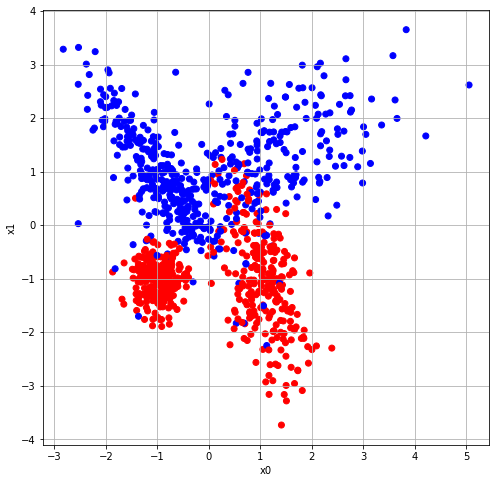

In [ ]:
import numpy as np
import sklearn.datasets as datasets


# сгенерируем данные
classification_data, classification_labels = datasets.make_classification(n_samples=1000,n_features = 2, n_informative = 2, 
                                                      n_classes = 2, n_redundant=0, 
                                                      n_clusters_per_class=2, random_state=5)


# визуализируем сгенерированные данные

colors = ListedColormap(['red', 'blue'])
light_colors = ListedColormap(['lightcoral', 'lightblue'])

plt.figure(figsize=(8,8))
plt.scatter(list(map(lambda x: x[0], classification_data)), list(map(lambda x: x[1], classification_data)), 
              c=classification_labels, cmap=colors)
plt.grid()
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
np.random.shuffle(np.arange(classification_labels.shape[0]))

In [ ]:
frq = np.zeros_like(classification_labels) # счетчик 
pred = np.zeros_like(classification_labels).astype(float)  #  накопление предиктов
n_split = 500
# строим случайный лес 
RF_=[]
for i in range(100):
    ind_ = np.arange(classification_labels.shape[0])
    np.random.shuffle(ind_)
    #print(ind_)
    ind_test = ind_[:n_split].tolist()
    ind_tr = ind_[n_split:].tolist()
    #print(ind_test)
    x_tr,y_tr = classification_data[ind_tr,:], classification_labels[ind_tr]
    x_test,y_test = classification_data[ind_test,:], classification_labels[ind_test]
    tree_i =DecisionTreeClassifier( ).fit(x_tr,y_tr)
    y_pred = tree_i.predict(x_test)
    RF_.append(tree_i)
    #oob
    pred[ind_test] += np.abs(y_test.astype(float) == y_pred).astype(float)
    frq[ind_test] += 1
    
error = np.mean(pred / frq)
error
    

0.8977342606707752

In [ ]:
frq[:5]

array([44, 50, 44, 53, 52])

In [ ]:
pred[:5]

array([44., 32., 44., 52., 52.])

In [ ]:
pred[:5] / frq[:5]

array([1.        , 0.64      , 1.        , 0.98113208, 1.        ])

In [ ]:
pred.sum()/frq.sum()

0.89814